# Handwritten text images from *[corto-ai/handwritten-text](https://huggingface.co/datasets/corto-ai/handwritten-text)*


In [ ]:
import io
import logging
import os
from pathlib import Path

import pandas as pd
from PIL import Image

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
)
logger = logging.getLogger(__name__)


SPLITS = {
    "train": "hf://datasets/corto-ai/handwritten-text/data/train-00000-of-00001.parquet",
    "valid": "hf://datasets/corto-ai/handwritten-text/data/valid-00000-of-00001.parquet",
    "test": "hf://datasets/corto-ai/handwritten-text/data/test-00000-of-00001.parquet",
}
OUTPUT_BASE = Path("datasets/handwritten-text-images")


def ensure_dir(path: Path):
    path.mkdir(parents=True, exist_ok=True)
    logger.info(f"Directory ready: {path}")


def dump_images_only(parquet_uri: str, split: str, out_base: Path):
    logger.info(f"Reading {split} from {parquet_uri}")
    df = pd.read_parquet(parquet_uri)
    logger.info(f" → {len(df)} samples")

    split_dir = out_base / split
    ensure_dir(split_dir)

    for idx, row in df.iterrows():
        img_bytes = row["image"]["bytes"]
        img = Image.open(io.BytesIO(img_bytes)).convert("L")

        # single class 0
        filename = f"{split}_{idx:05d}_0.png"
        img.save(split_dir / filename)

    logger.info(f"Saved {len(df)} images to {split_dir}")


def main():
    for split, uri in SPLITS.items():
        try:
            dump_images_only(uri, split, OUTPUT_BASE)
        except Exception as e:
            logger.error(f"Error in {split}: {e}")
            raise


if __name__ == "__main__":
    main()

INFO:__main__:Reading train from hf://datasets/corto-ai/handwritten-text/data/train-00000-of-00001.parquet
INFO:__main__: → 6482 samples
INFO:__main__:Directory ready: datasets/handwritten-text-images/train
INFO:__main__:Saved 6482 images to datasets/handwritten-text-images/train
INFO:__main__:Reading valid from hf://datasets/corto-ai/handwritten-text/data/valid-00000-of-00001.parquet
INFO:__main__: → 976 samples
INFO:__main__:Directory ready: datasets/handwritten-text-images/valid
INFO:__main__:Saved 976 images to datasets/handwritten-text-images/valid
INFO:__main__:Reading test from hf://datasets/corto-ai/handwritten-text/data/test-00000-of-00001.parquet
INFO:__main__: → 2915 samples
INFO:__main__:Directory ready: datasets/handwritten-text-images/test
INFO:__main__:Saved 2915 images to datasets/handwritten-text-images/test


# Handwritten AND printed text images from *[CATMuS/modern](https://huggingface.co/datasets/CATMuS/)*


In [14]:
dataset = load_dataset("CATMuS/modern", split="validation")

Resolving data files:   0%|          | 0/168 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

In [21]:
import logging
from pathlib import Path

from datasets import load_dataset

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
)
logger = logging.getLogger(__name__)

OUTPUT_BASE = Path("datasets/printed-handwritten-text-images")
SPLITS = ["train", "validation", "test"]


def process_split(split: str):
    logger.info(f"Processing {split} split")
    try:
        dataset = load_dataset("CATMuS/modern", split=split)
    except Exception as e:
        logger.error(f"Failed to load {split}: {e}")
        return

    for idx, example in enumerate(dataset):
        try:
            img = example["im"].convert("RGB")
            writing_type = example.get(
                "writing_type", "unknown"
            )  # This will be "handwritten" or "printed"

            # Create subfolder based on writing_type
            output_dir = OUTPUT_BASE / split / writing_type
            output_dir.mkdir(parents=True, exist_ok=True)

            img.save(output_dir / f"{split}_{idx:05d}_{writing_type}.png")
        except Exception as e:
            logger.error(f"Error processing {split} sample {idx}: {str(e)[:50]}")

    logger.info(f"Finished processing {split} split with {len(dataset)} samples")


def main():
    for split in SPLITS:
        process_split(split)


if __name__ == "__main__":
    main()

INFO:__main__:Processing train split


Resolving data files:   0%|          | 0/168 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/29 [00:00<?, ?it/s]

INFO:__main__:Finished processing train split with 105944 samples
INFO:__main__:Processing validation split


Resolving data files:   0%|          | 0/168 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:__main__:Finished processing validation split with 5887 samples
INFO:__main__:Processing test split


Resolving data files:   0%|          | 0/168 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:__main__:Finished processing test split with 5799 samples


32: This is the batch size, meaning that 32 images are being processed at once.

3: This represents the number of color channels in the images. For RGB images, this is typically 3 (Red, Green, Blue).

128: This is the height of the images after resizing.

512: This is the width of the images after resizing.

# Training with a subset

Shape X : torch.Size([32, 3, 256, 1024])
Shape y : torch.Size([32])


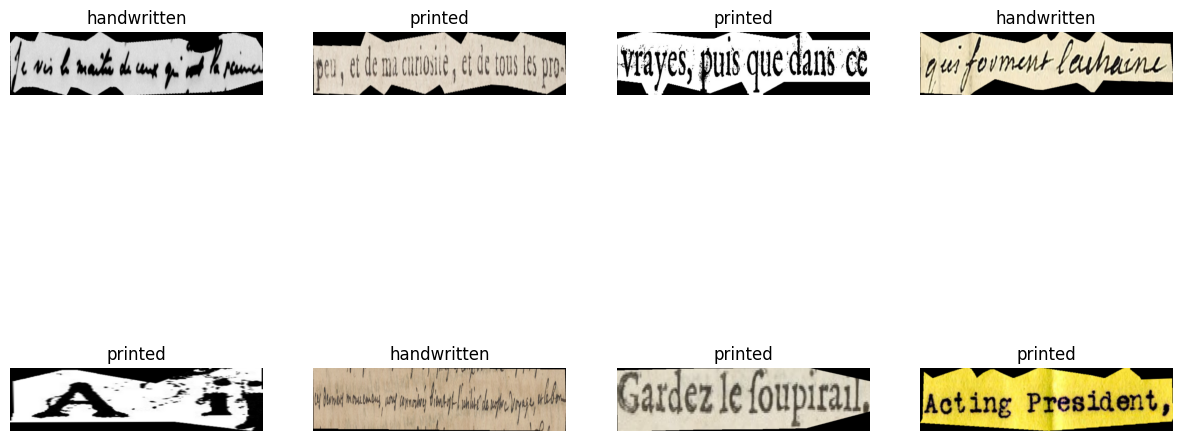

In [15]:
# Affichage de quelques ex

import matplotlib.pyplot as plt
import numpy as np

X_t, y_t = next(iter(dataloader_train))
print(f"Shape X : {X_t.shape}")
print(f"Shape y : {y_t.shape}")
plt.figure(figsize=(15, 8))
j = 1
for i in np.random.randint(0, len(X_t), size=[8]):
    plt.subplot(2, 4, j)
    plt.axis("off")
    im = X_t[i].permute(1, 2, 0)
    plt.imshow(im)
    plt.title(dataset_train.classes[y_t[i].item()])
    j += 1

In [16]:
from torchvision import models
from torchvision.models import MobileNet_V2_Weights

weights = MobileNet_V2_Weights.DEFAULT

model = models.mobilenet_v2(weights=weights)

for param in model.parameters():  # freeze des poids du modèle
    param.requires_grad = False

model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [18]:
import torch.nn as nn

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = "cpu"

num_classes = 2
model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

2025/06/02 11:14:07 INFO mlflow.tracking.fluent: Experiment with name 'MobileNetV2_transfer_learning_improved' does not exist. Creating a new experiment.


MLflow Run ID: a96ec72c20d445549ec130e86caa5492
Logged 'data_transforms.pkl' to 'preprocessing/' artifact subdirectory.


Epoch 0:   0%|          | 0/332 [00:00<?, ?it/s]

Epoch 1/5, Training Loss: 0.597, Validation Loss: 0.551


Epoch 1:   0%|          | 0/332 [00:00<?, ?it/s]

Epoch 2/5, Training Loss: 0.468, Validation Loss: 0.457


Epoch 2:   0%|          | 0/332 [00:00<?, ?it/s]

Epoch 3/5, Training Loss: 0.396, Validation Loss: 0.395


Epoch 3:   0%|          | 0/332 [00:00<?, ?it/s]

Epoch 4/5, Training Loss: 0.345, Validation Loss: 0.340


Epoch 4:   0%|          | 0/332 [00:00<?, ?it/s]

Epoch 5/5, Training Loss: 0.307, Validation Loss: 0.316


2025/06/02 11:26:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


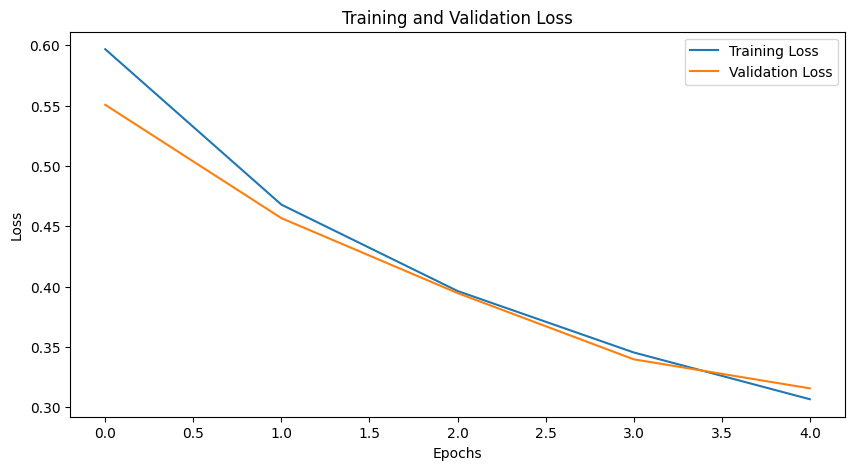

Test Loss: 0.3067690737937626
Test Accuracy: 0.917098445595855
Test Precision: 0.9243169035915147
Test Recall: 0.917098445595855
Test F1 Score: 0.9153123551960909
Test ROC AUC: 0.8982870577698165
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       348
           1       0.98      0.81      0.89       231

    accuracy                           0.92       579
   macro avg       0.93      0.90      0.91       579
weighted avg       0.92      0.92      0.92       579

Validation Loss: 0.27853396927055557
Validation Accuracy: 0.9200680272108843
Validation Precision: 0.9245635757249763
Validation Recall: 0.9200680272108843
Validation F1 Score: 0.9197143963907813
Validation ROC AUC: 0.9183776272364078
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       303
           1       0.97      0.86      0.91       285

    accuracy    

In [ ]:
# Transfer Learning
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from torch import optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, models, transforms
from torchvision.models import MobileNet_V2_Weights
from tqdm.notebook import tqdm

torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True

# Dataset Name and Description
dataset_name = "Printed-Handwritten Text Images"
dataset_description = """
This dataset consists of images containing printed and handwritten text.
- Purpose: To train a model for binary classification of images into printed or handwritten text.
- Content: Images resized to 256x1024 pixels.
- Structure: Divided into training, testing, and validation subsets.
"""

# Define the transformations
transform = transforms.Compose(
    [
        transforms.Resize((256, 1024)),
        transforms.RandomRotation(10),
        transforms.ColorJitter(
            brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1
        ),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

val_transform = transforms.Compose(
    [
        transforms.Resize((256, 1024)),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

# Define the base path to your datasets
base_path = Path(
    "./app/data/datasets/printed-handwritten-text-images"
)


# Define paths to your datasets using Path
train_path = base_path / "train"
test_path = base_path / "test"
validation_path = base_path / "validation"

# Load the data from the folder
dataset_train = datasets.ImageFolder(root=train_path, transform=transform)
dataset_test = datasets.ImageFolder(root=test_path, transform=val_transform)
dataset_validation = datasets.ImageFolder(
    root=validation_path, transform=val_transform
)


# Function to create a subset of a dataset
def create_subset(dataset, percentage):
    if percentage == 1.0:  # use full dataset if 1
        return dataset
    subset_size = int(percentage * len(dataset))
    indices = torch.randperm(
        len(dataset)
    ).tolist()  # Ensure reproducibility with torch.manual_seed
    subset_indices = indices[:subset_size]
    return Subset(dataset, subset_indices)


# Create subsets of the datasets
subset_percentage = 0.1
dataset_train_subset = create_subset(dataset_train, subset_percentage)
dataset_test_subset = create_subset(dataset_test, subset_percentage)
dataset_validation_subset = create_subset(dataset_validation, subset_percentage)

# Create DataLoaders for iterating over the data
dataloader_train = DataLoader(dataset_train_subset, batch_size=32, shuffle=True)
dataloader_test = DataLoader(dataset_test_subset, batch_size=32, shuffle=True)
dataloader_validation = DataLoader(
    dataset_validation_subset, batch_size=32, shuffle=True
)

weights = MobileNet_V2_Weights.DEFAULT

model = models.mobilenet_v2(weights=weights)

# Unfreezing last layer of the clf for transfer learning
for param in model.features[:-1].parameters():
    param.requires_grad = False

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Using last layer of the classifier
num_classes = 2
model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
model.to(device)

X_batch, y_batch = next(iter(dataloader_train))

# Define the loss function
criterion = nn.CrossEntropyLoss()

preprocess = weights.transforms()

y_pred = model(preprocess(X_batch.to(device)))

criterion(y_pred, y_batch.to(device))

#### MlFlow Setup ####
# Define the MLflow tracking directory
mlflow_dir = Path("./app/training/mlruns")

# Create the tracking directory if it does not exist
mlflow_dir.mkdir(parents=True, exist_ok=True)

# Create the .trash subdirectory if it does not exist
trash_dir = mlflow_dir / ".trash"
trash_dir.mkdir(exist_ok=True)

# Set the tracking URI to the directory
mlflow.set_tracking_uri(f"file:{mlflow_dir}")

# Initialize MLflow experiment
mlflow.set_experiment("MobileNetV2_transfer_learning_improved")

epochs = 5
learning_rate = 0.00001

# Define the optimizer
# optimizer = optim.Adam(model.parameters(), learning_rate)
optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()), learning_rate
)  # Ensure only trainable parameters are optimized

# Define the scheduler ReduceLROnPlateau
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=2
)

# Lists to store loss values
train_losses = []
val_losses = []

# Create a sample dataset for logging
sample_size = 5


def create_sample_dataset(dataset, sample_size=sample_size):
    sample_indices = torch.randperm(len(dataset))[:sample_size]
    sample_dataset = Subset(dataset, sample_indices)
    return sample_dataset


sample_train_dataset = create_sample_dataset(dataset_train_subset)
sample_test_dataset = create_sample_dataset(dataset_test_subset)
sample_validation_dataset = create_sample_dataset(dataset_validation_subset)

# Description of the model
model_description = """
Fine-Tuning Model using MobileNetV2 for Image Classification.
- Base Model: MobileNetV2 with pretrained weights for efficient feature extraction.
- Task: Binary classification of images.
- Input Image Size: Resized to 256x1024 pixels.
- Data Handling: Utilizes a % of the available dataset for training, testing, and validation.
- Training Strategy: Fine-tuning with training of more layers.
- Loss Function: Cross-Entropy Loss for classification tasks.
- Training Duration: 10 epochs with batch size of 32.
- Learning Rate Scheduler: ReduceLROnPlateau to adjust learning rate based on validation loss.
- Evaluation Metrics: Training and validation loss tracked per epoch.
- Device: Utilizes MPS if available, otherwise defaults to CPU.
- Sample Data: Logs a sample of 10 images from each dataset for reference.
- Preprocessing: Custom transforms for train and val/test are logged. Default model transforms also logged for reference.
"""


def evaluate(dataloader_val, dataset_type="validation"):
    model.eval()
    loss_val_total = 0
    predictions, true_vals = [], []
    for batch in dataloader_val:
        X_batch, y_batch = batch
        X_batch = preprocess(X_batch.to(device))
        y_batch = y_batch.to(device)
        with torch.no_grad():
            y_pred = model(X_batch.to(torch.float32))
        loss = criterion(y_pred, y_batch)
        loss_val_total += loss.item()
        predictions.extend(y_pred.detach().cpu().numpy())
        true_vals.extend(y_batch.cpu().numpy())

    loss_val_avg = loss_val_total / len(dataloader_val)
    predictions = np.array(predictions)
    predictions = np.argmax(predictions, axis=-1)
    true_vals = np.array(true_vals)

    accuracy = accuracy_score(true_vals, predictions)
    precision = precision_score(true_vals, predictions, average="weighted")
    recall = recall_score(true_vals, predictions, average="weighted")
    f1 = f1_score(true_vals, predictions, average="weighted")
    roc_auc = roc_auc_score(true_vals, predictions)
    class_report = classification_report(true_vals, predictions)
    cm = confusion_matrix(true_vals, predictions)

    mlflow.log_metrics(
        {
            f"{dataset_type}_loss": loss_val_avg,
            f"{dataset_type}_accuracy": accuracy,
            f"{dataset_type}_precision": precision,
            f"{dataset_type}_recall": recall,
            f"{dataset_type}_f1_score": f1,
            f"{dataset_type}_roc_auc": roc_auc,
        }
    )

    with open(f"{dataset_type}_classification_report.txt", "w") as f:
        f.write(class_report)
    mlflow.log_artifact(f"{dataset_type}_classification_report.txt")

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{dataset_type.capitalize()} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig(f"{dataset_type}_confusion_matrix.png")
    mlflow.log_artifact(f"{dataset_type}_confusion_matrix.png")
    plt.close()

    fpr, tpr, _ = roc_curve(true_vals, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=2,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{dataset_type.capitalize()} ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig(f"{dataset_type}_roc_curve.png")
    mlflow.log_artifact(f"{dataset_type}_roc_curve.png")
    plt.close()

    precision_curve, recall_curve, _ = precision_recall_curve(
        true_vals, predictions
    )
    plt.figure()
    plt.plot(recall_curve, precision_curve, color="blue", lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{dataset_type.capitalize()} Precision-Recall Curve")
    plt.savefig(f"{dataset_type}_precision_recall_curve.png")
    mlflow.log_artifact(f"{dataset_type}_precision_recall_curve.png")
    plt.close()

    return {
        "loss": loss_val_avg,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "classification_report": class_report,
        "confusion_matrix": cm,
    }


# Start an MLflow run
with mlflow.start_run() as run:
    print(f"MLflow Run ID: {run.info.run_id}")
    mlflow.log_params(
        {
            "subset_percentage": subset_percentage,
            "optimizer": "Adam",
            "learning_rate": learning_rate,
            "epochs": epochs,
            "batch_size": dataloader_train.batch_size,
            "train_dataset_size": len(dataset_train_subset),
            "test_dataset_size": len(dataset_test_subset),
            "validation_dataset_size": len(dataset_validation_subset),
            "sample_size": sample_size,
        }
    )

    # preprocessing transforms
    transform_pickle_filename = "data_transforms.pkl"

    with open(transform_pickle_filename, "wb") as f:
        pickle.dump(val_transform, f)

    mlflow.log_artifact(transform_pickle_filename, artifact_path="preprocessing")
    print(
        f"Logged '{transform_pickle_filename}' to 'preprocessing/' artifact subdirectory."
    )

    # Log dataset name and description
    mlflow.set_tag("dataset_name", dataset_name)
    mlflow.set_tag("dataset_description", dataset_description)

    # Log model description
    mlflow.set_tag("model_description", model_description)

    # Log sample datasets as artifacts
    torch.save(sample_train_dataset, "sample_train_dataset.pt")
    torch.save(sample_test_dataset, "sample_test_dataset.pt")
    torch.save(sample_validation_dataset, "sample_validation_dataset.pt")

    mlflow.log_artifact("sample_train_dataset.pt")
    mlflow.log_artifact("sample_test_dataset.pt")
    mlflow.log_artifact("sample_validation_dataset.pt")

    for epoch in range(epochs):
        model.train()
        loss_total = 0

        progress_bar = tqdm(
            dataloader_train,
            desc="Epoch {:1d}".format(epoch),
            leave=True,
            disable=False,
        )

        for i, batch in enumerate(progress_bar):
            X_batch, y_batch = batch
            X_batch = preprocess(X_batch.to(device))
            y_batch = y_batch.to(device)

            model.zero_grad()
            y_pred = model(X_batch.to(torch.float32))
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            loss_total += loss.item()
            progress_bar.set_postfix(
                {"training_loss": "{:.3f}".format(loss_total / (i + 1))}
            )

        avg_train_loss = loss_total / len(dataloader_train)
        train_losses.append(avg_train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_val, y_val in dataloader_test:
                X_val, y_val = preprocess(X_val.to(device)), y_val.to(device)
                outputs = model(X_val.to(torch.float32))
                loss = criterion(outputs, y_val)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(dataloader_test)
        val_losses.append(avg_val_loss)

        scheduler.step(avg_val_loss)

        mlflow.log_metrics(
            {
                "training_loss": avg_train_loss,
                "validation_loss": avg_val_loss,
            },
            step=epoch,
        )

        print(
            f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.3f}, Validation Loss: {avg_val_loss:.3f}"
        )

    # Log the model
    mlflow.pytorch.log_model(model, "transfer_clf_model")

    # Save the model with ONNX
    dummy_input = torch.randn(1, 3, 256, 1024, device=device)
    torch.onnx.export(
        model,
        dummy_input,
        "transfer_clf_model.onnx",
        input_names=["input"],
        output_names=["output"],
    )
    mlflow.log_artifact("transfer_clf_model.onnx")

    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.savefig("training_validation_loss.png")
    mlflow.log_artifact("training_validation_loss.png")
    plt.show()

    # Log evaluation metrics for test data
    test_metrics = evaluate(dataloader_test, dataset_type="test")
    print(f"Test Loss: {test_metrics['loss']}")
    print(f"Test Accuracy: {test_metrics['accuracy']}")
    print(f"Test Precision: {test_metrics['precision']}")
    print(f"Test Recall: {test_metrics['recall']}")
    print(f"Test F1 Score: {test_metrics['f1_score']}")
    print(f"Test ROC AUC: {test_metrics['roc_auc']}")
    print("Test Classification Report:")
    print(test_metrics["classification_report"])

    # Log evaluation metrics for validation data
    val_metrics = evaluate(dataloader_validation, dataset_type="validation")
    print(f"Validation Loss: {val_metrics['loss']}")
    print(f"Validation Accuracy: {val_metrics['accuracy']}")
    print(f"Validation Precision: {val_metrics['precision']}")
    print(f"Validation Recall: {val_metrics['recall']}")
    print(f"Validation F1 Score: {val_metrics['f1_score']}")
    print(f"Validation ROC AUC: {val_metrics['roc_auc']}")
    print("Validation Classification Report:")
    print(val_metrics["classification_report"])

# Fine-tuning

In [132]:
import torch
import torch.nn as nn


def count_layers(model):
    return sum(1 for _ in model.modules())


# Count the layers
num_layers = count_layers(model)
print(f"Num of layers in the model: {num_layers}")

Num of layers in the model: 213


MLflow Run ID: 4a6fb476fd554d6e8ae934375df2f55f
Logged 'data_transforms.pkl' to 'preprocessing/' artifact subdirectory.


Epoch 0:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 1/5, Training Loss: 0.454, Validation Loss: 0.273


Epoch 1:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 2/5, Training Loss: 0.212, Validation Loss: 0.172


Epoch 2:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 3/5, Training Loss: 0.154, Validation Loss: 0.157


Epoch 3:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 4/5, Training Loss: 0.124, Validation Loss: 0.147


Epoch 4:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 5/5, Training Loss: 0.114, Validation Loss: 0.162


2025/05/31 12:15:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


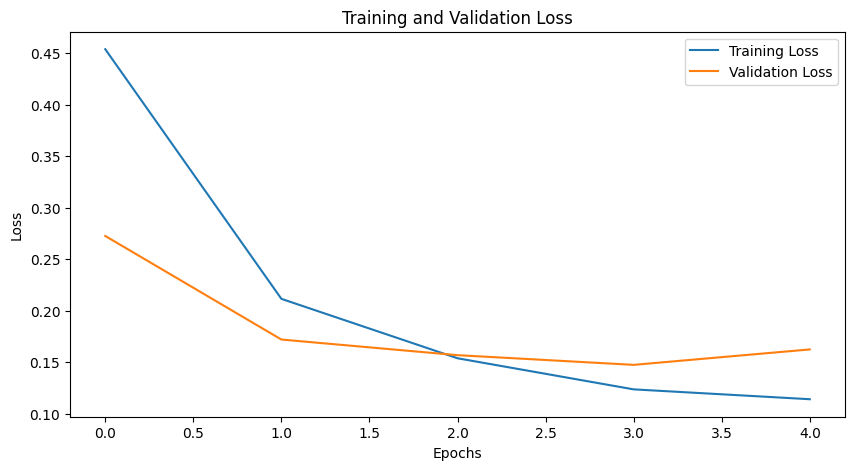

Test Loss: 0.16675884296585405
Test Accuracy: 0.9309551208285386
Test Precision: 0.9346805825203147
Test Recall: 0.9309551208285386
Test F1 Score: 0.9313784873341325
Test ROC AUC: 0.936114686114686
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       518
           1       0.88      0.96      0.92       351

    accuracy                           0.93       869
   macro avg       0.93      0.94      0.93       869
weighted avg       0.93      0.93      0.93       869

Validation Loss: 0.09012554689044398
Validation Accuracy: 0.970554926387316
Validation Precision: 0.9706550120878765
Validation Recall: 0.970554926387316
Validation F1 Score: 0.9705601415166327
Validation ROC AUC: 0.9707465384773408
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       456
           1       0.96      0.98      0.97       427

    accuracy    

In [ ]:
#
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.models import MobileNet_V2_Weights
from tqdm.notebook import tqdm

torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True

# Dataset Name and Description
dataset_name = "Printed-Handwritten Text Images"
dataset_description = """
This dataset consists of images containing printed and handwritten text.
- Purpose: To train a model for binary classification of images into printed or handwritten text.
- Content: Images resized to 256x1024 pixels.
- Structure: Divided into training, testing, and validation subsets.
"""

# Define the transformations
transform = transforms.Compose(
    [
        transforms.Resize((256, 1024)),
        transforms.RandomRotation(10),
        transforms.ColorJitter(
            brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1
        ),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)
# Use the existing val_transform variable from the notebook

# Define the base path to your datasets
base_path = Path(
    "./app/data/datasets/printed-handwritten-text-images"
)

# Define paths to your datasets using Path
train_path = base_path / "train"
test_path = base_path / "test"
validation_path = base_path / "validation"

# Load the data from the folder
dataset_train = datasets.ImageFolder(root=train_path, transform=transform)
dataset_test = datasets.ImageFolder(root=test_path, transform=val_transform)
dataset_validation = datasets.ImageFolder(
    root=validation_path, transform=val_transform
)


# Function to create a subset of a dataset
def create_subset(dataset, percentage):
    if percentage == 1.0:  # use full dataset if 1
        return dataset
    subset_size = int(percentage * len(dataset))
    indices = torch.randperm(
        len(dataset)
    ).tolist()  # Ensure reproducibility with torch.manual_seed
    subset_indices = indices[:subset_size]
    return Subset(dataset, subset_indices)


# Create subsets of the datasets
subset_percentage = 0.15
dataset_train_subset = create_subset(dataset_train, subset_percentage)
dataset_test_subset = create_subset(dataset_test, subset_percentage)
dataset_validation_subset = create_subset(dataset_validation, subset_percentage)

# Create DataLoaders for iterating over the data
dataloader_train = DataLoader(dataset_train_subset, batch_size=32, shuffle=True)
dataloader_test = DataLoader(dataset_test_subset, batch_size=32, shuffle=True)
dataloader_validation = DataLoader(
    dataset_validation_subset, batch_size=32, shuffle=True
)

weights = MobileNet_V2_Weights.DEFAULT

model = models.mobilenet_v2(weights=weights)

# Unfreeze some layers for fine-tuning
for param in model.features[:-5].parameters():
    param.requires_grad = False

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Using last layer of the classifier
num_classes = 2
model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
model.to(device)

X_batch, y_batch = next(iter(dataloader_train))

# Define the loss function
criterion = nn.CrossEntropyLoss()

preprocess = weights.transforms()

y_pred = model(preprocess(X_batch.to(device)))

criterion(y_pred, y_batch.to(device))

#### MlFlow Setup ####
# Define the MLflow tracking directory
mlflow_dir = Path("./app/training/mlruns")

# Create the tracking directory if it does not exist
mlflow_dir.mkdir(parents=True, exist_ok=True)

# Create the .trash subdirectory if it does not exist
trash_dir = mlflow_dir / ".trash"
trash_dir.mkdir(exist_ok=True)

# Set the tracking URI to the directory
mlflow.set_tracking_uri(f"file:{mlflow_dir}")

# Initialize MLflow experiment
mlflow.set_experiment("MobileNetV2_fine_tuning_classification_improved")

epochs = 5
learning_rate = 0.00001

# Define the optimizer
# optimizer = optim.Adam(model.parameters(), learning_rate)
optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()), learning_rate
)  # Ensure only trainable parameters are optimized

# Define the scheduler ReduceLROnPlateau
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=2
)

# Lists to store loss values
train_losses = []
val_losses = []

# Create a sample dataset for logging
sample_size = 5


def create_sample_dataset(dataset, sample_size=sample_size):
    sample_indices = torch.randperm(len(dataset))[:sample_size]
    sample_dataset = Subset(dataset, sample_indices)
    return sample_dataset


sample_train_dataset = create_sample_dataset(dataset_train_subset)
sample_test_dataset = create_sample_dataset(dataset_test_subset)
sample_validation_dataset = create_sample_dataset(dataset_validation_subset)

# Description of the model
model_description = """
Fine-Tuning Model using MobileNetV2 for Image Classification.
- Base Model: MobileNetV2 with pretrained weights for efficient feature extraction.
- Task: Binary classification of images.
- Input Image Size: Resized to 256x1024 pixels.
- Data Handling: Utilizes a % of the available dataset for training, testing, and validation.
- Training Strategy: Fine-tuning with training of more layers.
- Loss Function: Cross-Entropy Loss for classification tasks.
- Training Duration: 10 epochs with batch size of 32.
- Learning Rate Scheduler: ReduceLROnPlateau to adjust learning rate based on validation loss.
- Evaluation Metrics: Training and validation loss tracked per epoch.
- Device: Utilizes MPS if available, otherwise defaults to CPU.
- Sample Data: Logs a sample of 10 images from each dataset for reference.
- Preprocessing: Custom transforms for train and val/test are logged. Default model transforms also logged for reference.
"""


def evaluate(dataloader_val, dataset_type="validation"):
    model.eval()
    loss_val_total = 0
    predictions, true_vals = [], []
    for batch in dataloader_val:
        X_batch, y_batch = batch
        X_batch = preprocess(X_batch.to(device))
        y_batch = y_batch.to(device)
        with torch.no_grad():
            y_pred = model(X_batch.to(torch.float32))
        loss = criterion(y_pred, y_batch)
        loss_val_total += loss.item()
        predictions.extend(y_pred.detach().cpu().numpy())
        true_vals.extend(y_batch.cpu().numpy())

    loss_val_avg = loss_val_total / len(dataloader_val)
    predictions = np.array(predictions)
    predictions = np.argmax(predictions, axis=-1)
    true_vals = np.array(true_vals)

    accuracy = accuracy_score(true_vals, predictions)
    precision = precision_score(true_vals, predictions, average="weighted")
    recall = recall_score(true_vals, predictions, average="weighted")
    f1 = f1_score(true_vals, predictions, average="weighted")
    roc_auc = roc_auc_score(true_vals, predictions)
    class_report = classification_report(true_vals, predictions)
    cm = confusion_matrix(true_vals, predictions)

    mlflow.log_metrics(
        {
            f"{dataset_type}_loss": loss_val_avg,
            f"{dataset_type}_accuracy": accuracy,
            f"{dataset_type}_precision": precision,
            f"{dataset_type}_recall": recall,
            f"{dataset_type}_f1_score": f1,
            f"{dataset_type}_roc_auc": roc_auc,
        }
    )

    with open(f"{dataset_type}_classification_report.txt", "w") as f:
        f.write(class_report)
    mlflow.log_artifact(f"{dataset_type}_classification_report.txt")

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{dataset_type.capitalize()} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig(f"{dataset_type}_confusion_matrix.png")
    mlflow.log_artifact(f"{dataset_type}_confusion_matrix.png")
    plt.close()

    fpr, tpr, _ = roc_curve(true_vals, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=2,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{dataset_type.capitalize()} ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig(f"{dataset_type}_roc_curve.png")
    mlflow.log_artifact(f"{dataset_type}_roc_curve.png")
    plt.close()

    precision_curve, recall_curve, _ = precision_recall_curve(
        true_vals, predictions
    )
    plt.figure()
    plt.plot(recall_curve, precision_curve, color="blue", lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{dataset_type.capitalize()} Precision-Recall Curve")
    plt.savefig(f"{dataset_type}_precision_recall_curve.png")
    mlflow.log_artifact(f"{dataset_type}_precision_recall_curve.png")
    plt.close()

    return {
        "loss": loss_val_avg,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "classification_report": class_report,
        "confusion_matrix": cm,
    }


# Start an MLflow run
with mlflow.start_run() as run:
    print(f"MLflow Run ID: {run.info.run_id}")
    mlflow.log_params(
        {
            "subset_percentage": subset_percentage,
            "optimizer": "Adam",
            "learning_rate": learning_rate,
            "epochs": epochs,
            "batch_size": dataloader_train.batch_size,
            "train_dataset_size": len(dataset_train_subset),
            "test_dataset_size": len(dataset_test_subset),
            "validation_dataset_size": len(dataset_validation_subset),
            "sample_size": sample_size,
        }
    )

    # preprocessing transforms
    transform_pickle_filename = "data_transforms.pkl"

    with open(transform_pickle_filename, "wb") as f:
        pickle.dump(val_transform, f)

    mlflow.log_artifact(transform_pickle_filename, artifact_path="preprocessing")
    print(
        f"Logged '{transform_pickle_filename}' to 'preprocessing/' artifact subdirectory."
    )

    # Log dataset name and description
    mlflow.set_tag("dataset_name", dataset_name)
    mlflow.set_tag("dataset_description", dataset_description)

    # Log model description
    mlflow.set_tag("model_description", model_description)

    # Log sample datasets as artifacts
    torch.save(sample_train_dataset, "sample_train_dataset.pt")
    torch.save(sample_test_dataset, "sample_test_dataset.pt")
    torch.save(sample_validation_dataset, "sample_validation_dataset.pt")

    mlflow.log_artifact("sample_train_dataset.pt")
    mlflow.log_artifact("sample_test_dataset.pt")
    mlflow.log_artifact("sample_validation_dataset.pt")

    for epoch in range(epochs):
        model.train()
        loss_total = 0

        progress_bar = tqdm(
            dataloader_train,
            desc="Epoch {:1d}".format(epoch),
            leave=True,
            disable=False,
        )

        for i, batch in enumerate(progress_bar):
            X_batch, y_batch = batch
            X_batch = preprocess(X_batch.to(device))
            y_batch = y_batch.to(device)

            model.zero_grad()
            y_pred = model(X_batch.to(torch.float32))
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            loss_total += loss.item()
            progress_bar.set_postfix(
                {"training_loss": "{:.3f}".format(loss_total / (i + 1))}
            )

        avg_train_loss = loss_total / len(dataloader_train)
        train_losses.append(avg_train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_val, y_val in dataloader_test:
                X_val, y_val = preprocess(X_val.to(device)), y_val.to(device)
                outputs = model(X_val.to(torch.float32))
                loss = criterion(outputs, y_val)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(dataloader_test)
        val_losses.append(avg_val_loss)

        scheduler.step(avg_val_loss)

        mlflow.log_metrics(
            {
                "training_loss": avg_train_loss,
                "validation_loss": avg_val_loss,
            },
            step=epoch,
        )

        print(
            f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.3f}, Validation Loss: {avg_val_loss:.3f}"
        )

    # Log the model
    mlflow.pytorch.log_model(model, "fine_tuning_clf_model")

    # Save the model with ONNX
    dummy_input = torch.randn(1, 3, 256, 1024, device=device)
    torch.onnx.export(
        model,
        dummy_input,
        "fine_tuning_clf_model.onnx",
        input_names=["input"],
        output_names=["output"],
    )
    mlflow.log_artifact("fine_tuning_clf_model.onnx")

    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.savefig("training_validation_loss.png")
    mlflow.log_artifact("training_validation_loss.png")
    plt.show()

    # Log evaluation metrics for test data
    test_metrics = evaluate(dataloader_test, dataset_type="test")
    print(f"Test Loss: {test_metrics['loss']}")
    print(f"Test Accuracy: {test_metrics['accuracy']}")
    print(f"Test Precision: {test_metrics['precision']}")
    print(f"Test Recall: {test_metrics['recall']}")
    print(f"Test F1 Score: {test_metrics['f1_score']}")
    print(f"Test ROC AUC: {test_metrics['roc_auc']}")
    print("Test Classification Report:")
    print(test_metrics["classification_report"])

    # Log evaluation metrics for validation data
    val_metrics = evaluate(dataloader_validation, dataset_type="validation")
    print(f"Validation Loss: {val_metrics['loss']}")
    print(f"Validation Accuracy: {val_metrics['accuracy']}")
    print(f"Validation Precision: {val_metrics['precision']}")
    print(f"Validation Recall: {val_metrics['recall']}")
    print(f"Validation F1 Score: {val_metrics['f1_score']}")
    print(f"Validation ROC AUC: {val_metrics['roc_auc']}")
    print("Validation Classification Report:")
    print(val_metrics["classification_report"])

2025/06/02 12:59:59 INFO mlflow.tracking.fluent: Experiment with name 'MobileNetV2_fine_tuning' does not exist. Creating a new experiment.


MLflow Run ID: 277a2921a6fd4e5ab07d0e5f49f68bff
Logged 'data_transforms.pkl' to 'preprocessing/' artifact subdirectory.


Epoch 0:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 1/10, Training Loss: 0.449, Validation Loss: 0.264


Epoch 1:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 2/10, Training Loss: 0.203, Validation Loss: 0.167


Epoch 2:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 3/10, Training Loss: 0.146, Validation Loss: 0.154


Epoch 3:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 4/10, Training Loss: 0.117, Validation Loss: 0.146


Epoch 4:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 5/10, Training Loss: 0.106, Validation Loss: 0.164


Epoch 5:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 6/10, Training Loss: 0.094, Validation Loss: 0.157


Epoch 6:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 7/10, Training Loss: 0.087, Validation Loss: 0.187


Epoch 7:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 8/10, Training Loss: 0.080, Validation Loss: 0.172


Epoch 8:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 9/10, Training Loss: 0.082, Validation Loss: 0.191


Epoch 9:   0%|          | 0/497 [00:00<?, ?it/s]

Epoch 10/10, Training Loss: 0.081, Validation Loss: 0.168


2025/06/02 13:36:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


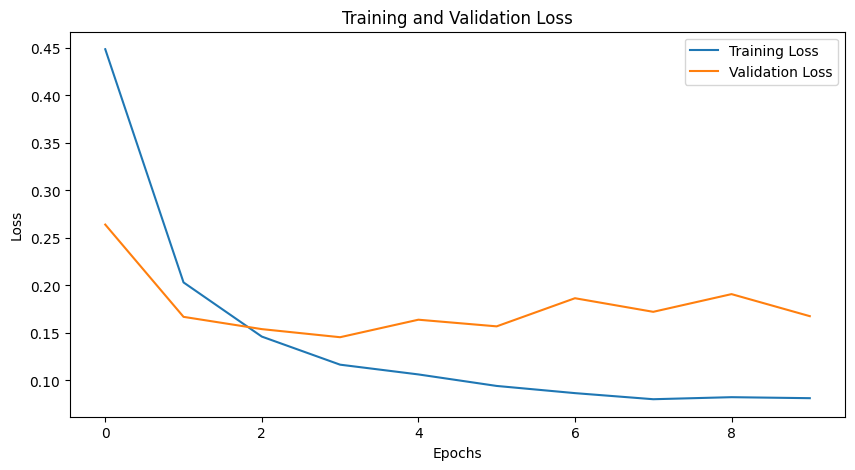

Test Loss: 0.16484098402517183
Test Accuracy: 0.9332566168009206
Test Precision: 0.9373423662367898
Test Recall: 0.9332566168009206
Test F1 Score: 0.9336831232984366
Test ROC AUC: 0.9389636889636889
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       518
           1       0.88      0.97      0.92       351

    accuracy                           0.93       869
   macro avg       0.93      0.94      0.93       869
weighted avg       0.94      0.93      0.93       869

Validation Loss: 0.07122731524785715
Validation Accuracy: 0.9773499433748585
Validation Precision: 0.9773958917886022
Validation Recall: 0.9773499433748585
Validation F1 Score: 0.9773528507170826
Validation ROC AUC: 0.9774744237643289
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       456
           1       0.97      0.98      0.98       427

    accuracy 

In [ ]:
#
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.models import MobileNet_V2_Weights
from tqdm.notebook import tqdm

torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True

# Dataset Name and Description
dataset_name = "Printed-Handwritten Text Images"
dataset_description = """
This dataset consists of images containing printed and handwritten text.
- Purpose: To train a model for binary classification of images into printed or handwritten text.
- Content: Images resized to 256x1024 pixels.
- Structure: Divided into training, testing, and validation subsets.
"""

# Define the transformations
transform = transforms.Compose(
    [
        transforms.Resize((256, 1024)),
        transforms.RandomRotation(10),
        transforms.ColorJitter(
            brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1
        ),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

val_transform = transforms.Compose(
    [
        transforms.Resize((256, 1024)),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

# Define the base path to your datasets
base_path = Path(
    "./app/data/datasets/printed-handwritten-text-images"
)

# Define paths to your datasets using Path
train_path = base_path / "train"
test_path = base_path / "test"
validation_path = base_path / "validation"

# Load the data from the folder
dataset_train = datasets.ImageFolder(root=train_path, transform=transform)
dataset_test = datasets.ImageFolder(root=test_path, transform=val_transform)
dataset_validation = datasets.ImageFolder(
    root=validation_path, transform=val_transform
)


# Function to create a subset of a dataset
def create_subset(dataset, percentage):
    if percentage == 1.0:  # use full dataset if 1
        return dataset
    subset_size = int(percentage * len(dataset))
    indices = torch.randperm(
        len(dataset)
    ).tolist()  # Ensure reproducibility with torch.manual_seed
    subset_indices = indices[:subset_size]
    return Subset(dataset, subset_indices)


# Create subsets of the datasets
subset_percentage = 0.15
dataset_train_subset = create_subset(dataset_train, subset_percentage)
dataset_test_subset = create_subset(dataset_test, subset_percentage)
dataset_validation_subset = create_subset(dataset_validation, subset_percentage)

# Create DataLoaders for iterating over the data
dataloader_train = DataLoader(dataset_train_subset, batch_size=32, shuffle=True)
dataloader_test = DataLoader(dataset_test_subset, batch_size=32, shuffle=True)
dataloader_validation = DataLoader(
    dataset_validation_subset, batch_size=32, shuffle=True
)

weights = MobileNet_V2_Weights.DEFAULT

model = models.mobilenet_v2(weights=weights)

# Unfreeze some layers for fine-tuning
for param in model.features[:-6].parameters():
    param.requires_grad = False

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Using last layer of the classifier
num_classes = 2
model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
model.to(device)

X_batch, y_batch = next(iter(dataloader_train))

# Define the loss function
criterion = nn.CrossEntropyLoss()

preprocess = weights.transforms()

y_pred = model(preprocess(X_batch.to(device)))

criterion(y_pred, y_batch.to(device))

#### MlFlow Setup ####
# Define the MLflow tracking directory
mlflow_dir = Path("./app/training/mlruns")

# Create the tracking directory if it does not exist
mlflow_dir.mkdir(parents=True, exist_ok=True)

# Create the .trash subdirectory if it does not exist
trash_dir = mlflow_dir / ".trash"
trash_dir.mkdir(exist_ok=True)

# Set the tracking URI to the directory
mlflow.set_tracking_uri(f"file:{mlflow_dir}")

# Initialize MLflow experiment
mlflow.set_experiment("MobileNetV2_fine_tuning")

epochs = 10
learning_rate = 0.00001

# Define the optimizer
# optimizer = optim.Adam(model.parameters(), learning_rate)
optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()), learning_rate
)  # Ensure only trainable parameters are optimized

# Define the scheduler ReduceLROnPlateau
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=2
)

# Lists to store loss values
train_losses = []
val_losses = []

# Create a sample dataset for logging
sample_size = 3


def create_sample_dataset(dataset, sample_size=sample_size):
    sample_indices = torch.randperm(len(dataset))[:sample_size]
    sample_dataset = Subset(dataset, sample_indices)
    return sample_dataset


sample_train_dataset = create_sample_dataset(dataset_train_subset)
sample_test_dataset = create_sample_dataset(dataset_test_subset)
sample_validation_dataset = create_sample_dataset(dataset_validation_subset)

# Description of the model
model_description = """
Fine-Tuning Model using MobileNetV2 for Image Classification.
- Base Model: MobileNetV2 with pretrained weights for efficient feature extraction.
- Task: Binary classification of images.
- Input Image Size: Resized to 256x1024 pixels.
- Data Handling: Utilizes a % of the available dataset for training, testing, and validation.
- Training Strategy: Fine-tuning with training of more layers.
- Loss Function: Cross-Entropy Loss for classification tasks.
- Training Duration: 10 epochs with batch size of 32.
- Learning Rate Scheduler: ReduceLROnPlateau to adjust learning rate based on validation loss.
- Evaluation Metrics: Training and validation loss tracked per epoch.
- Device: Utilizes MPS if available, otherwise defaults to CPU.
- Sample Data: Logs a sample of 10 images from each dataset for reference.
- Preprocessing: Custom transforms for train and val/test are logged. Default model transforms also logged for reference.
"""


def evaluate(dataloader_val, dataset_type="validation"):
    model.eval()
    loss_val_total = 0
    predictions, true_vals = [], []
    for batch in dataloader_val:
        X_batch, y_batch = batch
        X_batch = preprocess(X_batch.to(device))
        y_batch = y_batch.to(device)
        with torch.no_grad():
            y_pred = model(X_batch.to(torch.float32))
        loss = criterion(y_pred, y_batch)
        loss_val_total += loss.item()
        predictions.extend(y_pred.detach().cpu().numpy())
        true_vals.extend(y_batch.cpu().numpy())

    loss_val_avg = loss_val_total / len(dataloader_val)
    predictions = np.array(predictions)
    predictions = np.argmax(predictions, axis=-1)
    true_vals = np.array(true_vals)

    accuracy = accuracy_score(true_vals, predictions)
    precision = precision_score(true_vals, predictions, average="weighted")
    recall = recall_score(true_vals, predictions, average="weighted")
    f1 = f1_score(true_vals, predictions, average="weighted")
    roc_auc = roc_auc_score(true_vals, predictions)
    class_report = classification_report(true_vals, predictions)
    cm = confusion_matrix(true_vals, predictions)

    mlflow.log_metrics(
        {
            f"{dataset_type}_loss": loss_val_avg,
            f"{dataset_type}_accuracy": accuracy,
            f"{dataset_type}_precision": precision,
            f"{dataset_type}_recall": recall,
            f"{dataset_type}_f1_score": f1,
            f"{dataset_type}_roc_auc": roc_auc,
        }
    )

    with open(f"{dataset_type}_classification_report.txt", "w") as f:
        f.write(class_report)
    mlflow.log_artifact(f"{dataset_type}_classification_report.txt")

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{dataset_type.capitalize()} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig(f"{dataset_type}_confusion_matrix.png")
    mlflow.log_artifact(f"{dataset_type}_confusion_matrix.png")
    plt.close()

    fpr, tpr, _ = roc_curve(true_vals, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=2,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{dataset_type.capitalize()} ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig(f"{dataset_type}_roc_curve.png")
    mlflow.log_artifact(f"{dataset_type}_roc_curve.png")
    plt.close()

    precision_curve, recall_curve, _ = precision_recall_curve(
        true_vals, predictions
    )
    plt.figure()
    plt.plot(recall_curve, precision_curve, color="blue", lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{dataset_type.capitalize()} Precision-Recall Curve")
    plt.savefig(f"{dataset_type}_precision_recall_curve.png")
    mlflow.log_artifact(f"{dataset_type}_precision_recall_curve.png")
    plt.close()

    return {
        "loss": loss_val_avg,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "classification_report": class_report,
        "confusion_matrix": cm,
    }


# Start an MLflow run
with mlflow.start_run() as run:
    print(f"MLflow Run ID: {run.info.run_id}")
    mlflow.log_params(
        {
            "subset_percentage": subset_percentage,
            "optimizer": "Adam",
            "learning_rate": learning_rate,
            "epochs": epochs,
            "batch_size": dataloader_train.batch_size,
            "train_dataset_size": len(dataset_train_subset),
            "test_dataset_size": len(dataset_test_subset),
            "validation_dataset_size": len(dataset_validation_subset),
            "sample_size": sample_size,
        }
    )

    # preprocessing transforms
    transform_pickle_filename = "data_transforms.pkl"

    with open(transform_pickle_filename, "wb") as f:
        pickle.dump(val_transform, f)

    mlflow.log_artifact(transform_pickle_filename, artifact_path="preprocessing")
    print(
        f"Logged '{transform_pickle_filename}' to 'preprocessing/' artifact subdirectory."
    )

    # Log dataset name and description
    mlflow.set_tag("dataset_name", dataset_name)
    mlflow.set_tag("dataset_description", dataset_description)

    # Log model description
    mlflow.set_tag("model_description", model_description)

    # Log sample datasets as artifacts
    torch.save(sample_train_dataset, "sample_train_dataset.pt")
    torch.save(sample_test_dataset, "sample_test_dataset.pt")
    torch.save(sample_validation_dataset, "sample_validation_dataset.pt")

    mlflow.log_artifact("sample_train_dataset.pt")
    mlflow.log_artifact("sample_test_dataset.pt")
    mlflow.log_artifact("sample_validation_dataset.pt")

    for epoch in range(epochs):
        model.train()
        loss_total = 0

        progress_bar = tqdm(
            dataloader_train,
            desc="Epoch {:1d}".format(epoch),
            leave=True,
            disable=False,
        )

        for i, batch in enumerate(progress_bar):
            X_batch, y_batch = batch
            X_batch = preprocess(X_batch.to(device))
            y_batch = y_batch.to(device)

            model.zero_grad()
            y_pred = model(X_batch.to(torch.float32))
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            loss_total += loss.item()
            progress_bar.set_postfix(
                {"training_loss": "{:.3f}".format(loss_total / (i + 1))}
            )

        avg_train_loss = loss_total / len(dataloader_train)
        train_losses.append(avg_train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_val, y_val in dataloader_test:
                X_val, y_val = preprocess(X_val.to(device)), y_val.to(device)
                outputs = model(X_val.to(torch.float32))
                loss = criterion(outputs, y_val)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(dataloader_test)
        val_losses.append(avg_val_loss)

        scheduler.step(avg_val_loss)

        mlflow.log_metrics(
            {
                "training_loss": avg_train_loss,
                "validation_loss": avg_val_loss,
            },
            step=epoch,
        )

        print(
            f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.3f}, Validation Loss: {avg_val_loss:.3f}"
        )

    # Log the model
    mlflow.pytorch.log_model(model, "model")

    # Save the model with ONNX
    dummy_input = torch.randn(1, 3, 256, 1024, device=device)
    torch.onnx.export(
        model,
        dummy_input,
        "model.onnx",
        input_names=["input"],
        output_names=["output"],
    )
    mlflow.log_artifact("model.onnx")

    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.savefig("training_validation_loss.png")
    mlflow.log_artifact("training_validation_loss.png")
    plt.show()

    # Log evaluation metrics for test data
    test_metrics = evaluate(dataloader_test, dataset_type="test")
    print(f"Test Loss: {test_metrics['loss']}")
    print(f"Test Accuracy: {test_metrics['accuracy']}")
    print(f"Test Precision: {test_metrics['precision']}")
    print(f"Test Recall: {test_metrics['recall']}")
    print(f"Test F1 Score: {test_metrics['f1_score']}")
    print(f"Test ROC AUC: {test_metrics['roc_auc']}")
    print("Test Classification Report:")
    print(test_metrics["classification_report"])

    # Log evaluation metrics for validation data
    val_metrics = evaluate(dataloader_validation, dataset_type="validation")
    print(f"Validation Loss: {val_metrics['loss']}")
    print(f"Validation Accuracy: {val_metrics['accuracy']}")
    print(f"Validation Precision: {val_metrics['precision']}")
    print(f"Validation Recall: {val_metrics['recall']}")
    print(f"Validation F1 Score: {val_metrics['f1_score']}")
    print(f"Validation ROC AUC: {val_metrics['roc_auc']}")
    print("Validation Classification Report:")
    print(val_metrics["classification_report"])

# Inference

In [ ]:
import torch
import torch.nn.functional as F  # Import the functional module for softmax
from torchvision import transforms

model_path = Path("./app/training/mlruns/634992157160620536/06dffae88d514b8f8affeddb8b4c83a1/artifacts/fine_tuning_clf_model/data/model.pth")

model = torch.load(model_path, weights_only=False)
model.eval()  # eval

# MPS
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = model.to(device)


val_transform = transforms.Compose(
    [
        transforms.Resize((256, 1024)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)


# all images in the directory
image_directory = "./app/training/images/"
image_files = [
    f
    for f in os.listdir(image_directory)
    if f.endswith(".png") or f.endswith(".jpg")
]

for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    image = Image.open(image_path).convert("RGB")
    image_tensor = val_transform(image).unsqueeze(0)  # Add a batch dimension

    # Moving inport tensor to MPS
    image_tensor = image_tensor.to(device)

    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)  # logits to proba
        _, predicted = torch.max(outputs, 1)

    # Getting p^roba
    predicted_probability = probabilities[0, predicted].item()
    print(
        f"Prediction for {image_file}: {predicted.item()} with probability {predicted_probability:.4f}"
    )

Prediction for test_00010_0.png: 0 with probability 0.8186
Prediction for test_00009_0.png: 0 with probability 0.9202
Prediction for Screenshot 2025-05-25 at 16.44.12.png: 1 with probability 0.7692
Prediction for test_00011_0.png: 0 with probability 0.9208
Prediction for Screenshot 2025-05-25 at 23.50.06.png: 1 with probability 0.7877
Prediction for test_00008_0.png: 0 with probability 0.9416
Prediction for test_00002_0.png: 0 with probability 0.8767
Prediction for test_00000_0.png: 0 with probability 0.8503
Prediction for test_00004_0.png: 0 with probability 0.8260
Prediction for test_00006_0.png: 0 with probability 0.8836
Prediction for test_00001_0.png: 0 with probability 0.7524
Prediction for test_00003_0.png: 0 with probability 0.7316
Prediction for test_00007_0.png: 0 with probability 0.8122
Prediction for test_00005_0.png: 0 with probability 0.8197


In [ ]:
import os

import numpy as np
import onnxruntime as ort
from PIL import Image
from torchvision import transforms


# Define the softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)


# Path to the ONNX model
onnx_model_path = Path(
    "./app/training/mlruns/634992157160620536/06dffae88d514b8f8affeddb8b4c83a1/artifacts/fine_tuning_clf_model/fine_tuning_clf_model.onnx"
)


# Load the ONNX model
try:
    ort_session = ort.InferenceSession(onnx_model_path)
except Exception as e:
    print(f"Error loading ONNX model: {e}")
    exit(1)

# Define the transformation to match the model's expected input shape [1, 3, 256, 1024]
val_transform = transforms.Compose(
    [
        transforms.Resize((256, 1024)),  # Resize to 256x1024
        transforms.ToTensor(),  # Convert to tensor [3, 256, 1024]
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # Normalize
    ]
)

# Directory containing the images
image_directory = "./app/training/images/"

# List all image files in the directory
image_files = [
    f
    for f in os.listdir(image_directory)
    if f.endswith(".png") or f.endswith(".jpg")
]
if not image_files:
    print(f"No image files found in {image_directory}")
    exit(1)

# Loop through each image file
for image_file in image_files:
    try:
        # Load and preprocess the image
        image_path = os.path.join(image_directory, image_file)
        image = Image.open(image_path).convert("RGB")
        image_tensor = val_transform(image).unsqueeze(
            0
        )  # Add batch dimension: [1, 3, 256, 1024]

        # Convert to NumPy array for ONNX Runtime
        input_data = image_tensor.numpy()

        # Verify input shape
        print(f"Input shape for {image_file}: {input_data.shape}")

        # Perform inference using ONNX Runtime
        outputs = ort_session.run(["output"], {"input": input_data})

        # Get logits from the output
        logits = outputs[0]

        # Compute predicted class
        predicted = np.argmax(logits, axis=1)[0]

        # Compute probabilities using softmax
        probabilities = softmax(logits)

        # Get the probability of the predicted class
        predicted_probability = probabilities[0, predicted]

        # Map predicted class to label (assuming 0 = handwritten, 1 = printed)
        class_label = "Handwritten" if predicted == 0 else "Printed"

        # Print the prediction and its probability
        print(
            f"Prediction for {image_file}: {class_label} (class {predicted}) with probability {predicted_probability:.4f}"
        )

    except Exception as e:
        print(f"Error processing {image_file}: {e}")
        continue

# Interpretability

https://captum.ai/docs/attribution_algorithms

Dans le cas des réseaux de neurones convolutifs (CNN), il est pertinent d'utiliser les features de sortie de la partie convolutionnelle du réseau. En effet, les opérations de convolution et de pooling préservent les informations spatiales, puisque la convolution s'applique localement autour d'un pixel. Ainsi, chaque pixel de la sortie convolutionnelle (avant les couches "linear") correspond à une région spécifique de l'image, ce qui permet de comprendre non seulement ce que l'image contient, mais aussi où ces éléments se trouvent.

Le Grad-CAM vise alors à identifier quels pixels de la sortie convolutionnelle (et donc quelle zone de l'image initiale) sont importants pour la décision du modèle.

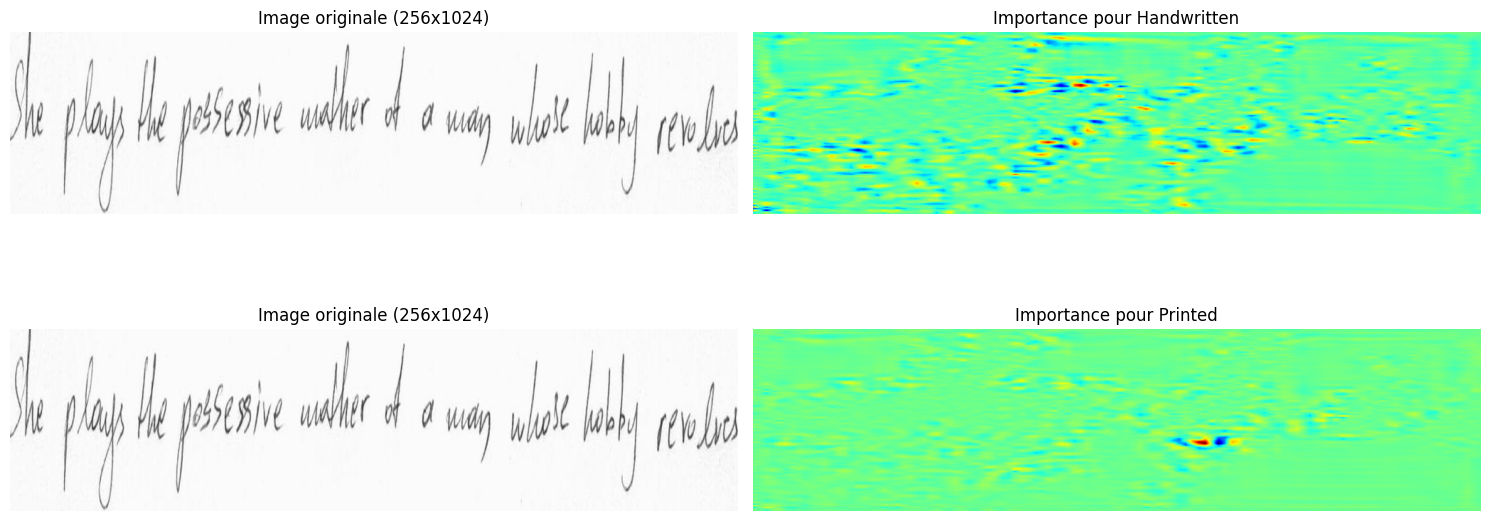

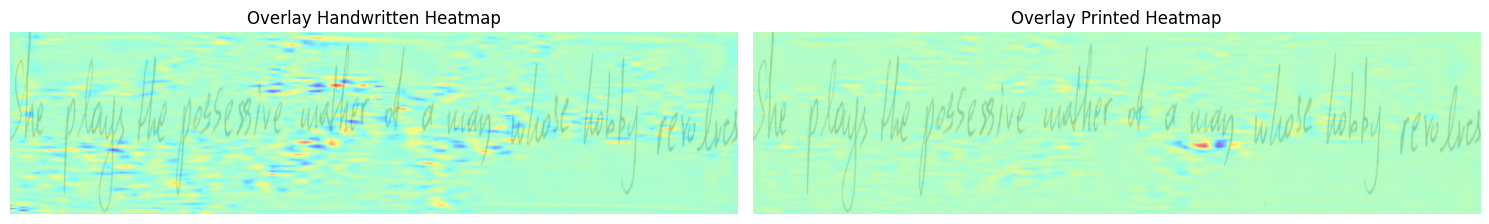

In [ ]:
import os

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import torch
from captum.attr import LayerIntegratedGradients
from PIL import Image
from scipy.ndimage import zoom
from torchvision import transforms

# Set device (prioritize CUDA, fallback to MPS or CPU)
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# Load the fine-tuned PyTorch model with the provided MLflow run ID
correct_run_id = "31979110704543208cb9bbaf7eba35a9"
model_uri = f"runs:/{correct_run_id}/fine_tuning_clf_model"
model = mlflow.pytorch.load_model(model_uri)
model.to(device)
model.eval()

# Define preprocessing to match training and inference
preprocess = transforms.Compose(
    [
        transforms.Resize((256, 1024)),  # Resize to 256x1024
        transforms.CenterCrop(224),  # Crop to 224x224 for MobileNetV2
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)

# Initialize LayerIntegratedGradients with the first convolutional layer of MobileNetV2
lig = LayerIntegratedGradients(model, model.features[0][0])


# Function to compute and upsample importance scores
def show_importance(
    model, input_tensor, target=0, output_size=(256, 1024), device=device
):
    input_tensor = input_tensor.to(device)
    model.to(device)
    # Compute attributions using LayerIntegratedGradients
    attributions, delta = lig.attribute(
        inputs=input_tensor,
        target=target,
        return_convergence_delta=True,
        n_steps=100,
    )
    # Sum across channels to get a 2D importance map
    importance = attributions.sum(dim=1).squeeze(0)
    importance = importance.cpu().detach().numpy()
    # Normalize by L2 norm (as in original code)
    importance = importance / (
        np.linalg.norm(importance) + 1e-10
    )  # Add small epsilon to avoid division by zero
    # Upsample to match original image size (256x1024)
    zoom_factors = (
        output_size[0] / importance.shape[0],
        output_size[1] / importance.shape[1],
    )
    importance = zoom(importance, zoom_factors, order=1)  # Linear interpolation
    return importance


# Load an image from the directory
image_directory = Path("./app/training/images/")
image_files = [
    f
    for f in os.listdir(image_directory)
    if f.endswith(".png") or f.endswith(".jpg")
]

if not image_files:
    print(f"No image files found in {image_directory}")
else:
    # Select the first image
    selected_image = image_files[0]
    image_path = os.path.join(image_directory, selected_image)
    try:
        img = Image.open(image_path).convert("RGB")
        # Resize original image to 256x1024 for consistent display
        img_display = img.resize((1024, 256), Image.LANCZOS)

        # Preprocess the image for the model
        img_tensor = preprocess(img).unsqueeze(0)  # Shape: [1, 3, 224, 224]

        # Define class indices (0: Handwritten, 1: Printed)
        handwritten_index = 0
        printed_index = 1

        # Compute heatmaps for both classes, upsampled to 256x1024
        heatmap_handwritten = show_importance(
            model,
            img_tensor,
            target=handwritten_index,
            output_size=(256, 1024),
            device=device,
        )
        heatmap_printed = show_importance(
            model,
            img_tensor,
            target=printed_index,
            output_size=(256, 1024),
            device=device,
        )

        # Visualize the results
        plt.figure(figsize=(15, 7))

        # Original image (top left)
        plt.subplot(2, 2, 1)
        plt.imshow(img_display)
        plt.title("Image originale (256x1024)")
        plt.axis("off")

        # Heatmap for Handwritten (top right)
        plt.subplot(2, 2, 2)
        plt.imshow(heatmap_handwritten, cmap="jet")
        plt.title("Importance pour Handwritten")
        plt.axis("off")

        # Original image (bottom left)
        plt.subplot(2, 2, 3)
        plt.imshow(img_display)
        plt.title("Image originale (256x1024)")
        plt.axis("off")

        # Heatmap for Printed (bottom right)
        plt.subplot(2, 2, 4)
        plt.imshow(heatmap_printed, cmap="jet")
        plt.title("Importance pour Printed")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

        # Optional: Overlay heatmaps on the original image
        plt.figure(figsize=(15, 7))

        # Overlay for Handwritten
        plt.subplot(1, 2, 1)
        plt.imshow(img_display, alpha=0.5)
        plt.imshow(heatmap_handwritten, cmap="jet", alpha=0.5)
        plt.title("Overlay Handwritten Heatmap")
        plt.axis("off")

        # Overlay for Printed
        plt.subplot(1, 2, 2)
        plt.imshow(img_display, alpha=0.5)
        plt.imshow(heatmap_printed, cmap="jet", alpha=0.5)
        plt.title("Overlay Printed Heatmap")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {selected_image}: {e}")

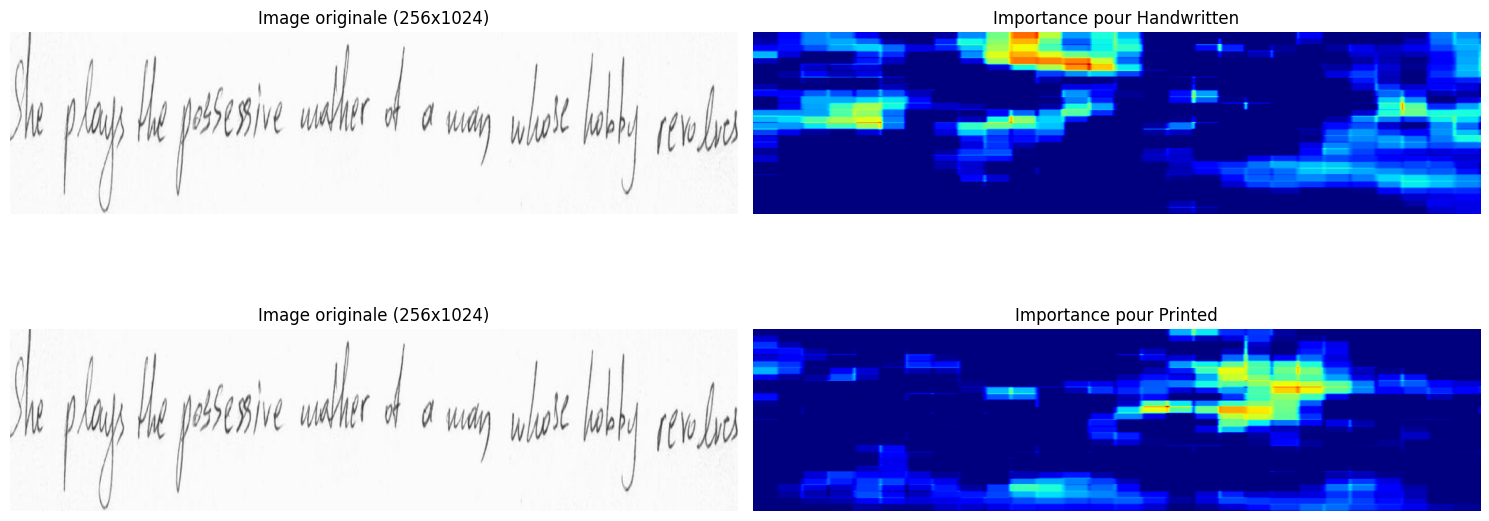

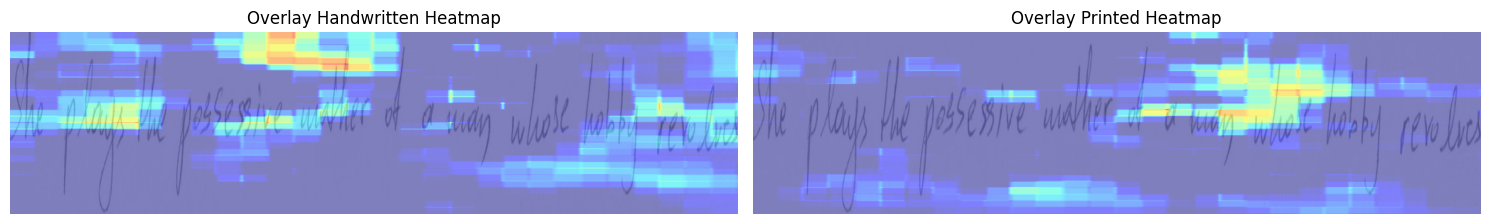

In [ ]:
import os

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import torch
from captum.attr import Occlusion
from PIL import Image
from torchvision import transforms

# Set device (prioritize CUDA, fallback to MPS or CPU)
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# Load the fine-tuned PyTorch model with the provided MLflow run ID
correct_run_id = "31979110704543208cb9bbaf7eba35a9"
model_uri = f"runs:/{correct_run_id}/fine_tuning_clf_model"
model = mlflow.pytorch.load_model(model_uri)
model.to(device)
model.eval()

# Define preprocessing to match training and inference
preprocess = transforms.Compose(
    [
        transforms.Resize((256, 1024)),  # Resize to 256x1024
        transforms.CenterCrop(224),  # Crop to 224x224 for MobileNetV2
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)

# Initialize Occlusion with the model
lig = Occlusion(model)

# Define sliding window and strides
sliding_window_shapes = (3, 15, 15)  # Window size: 3 channels, 15x15 pixels
strides = (3, 8, 8)  # Strides: 8 pixels in height and width


# Function to compute and upsample importance scores
def show_importance(
    model, input_tensor, target=0, output_size=(256, 1024), device=device
):
    input_tensor = input_tensor.to(device)
    model.to(device)
    # Compute attributions using Occlusion
    attributions = lig.attribute(
        inputs=input_tensor,
        strides=strides,
        target=target,
        sliding_window_shapes=sliding_window_shapes,
    )
    # Sum across channels to get a 2D importance map
    importance = attributions.sum(dim=1).squeeze(0)
    importance = importance.cpu().detach().numpy()
    # Keep only positive values and normalize
    importance = np.maximum(importance, 0)  # Ne garder que les valeurs positives
    if np.max(importance) != 0:  # Avoid division by zero
        importance /= np.max(importance)  # Normaliser la heatmap
    # Upsample to match original image size (256x1024)
    zoom_factors = (
        output_size[0] / importance.shape[0],
        output_size[1] / importance.shape[1],
    )
    importance = zoom(importance, zoom_factors, order=1)  # Linear interpolation
    return importance


# Load an image from the directory
image_directory = Path("./app/training/images/")

image_files = [
    f
    for f in os.listdir(image_directory)
    if f.endswith(".png") or f.endswith(".jpg")
]

if not image_files:
    print(f"No image files found in {image_directory}")
else:
    # Select the first image
    selected_image = image_files[0]
    image_path = os.path.join(image_directory, selected_image)
    img = Image.open(image_path).convert("RGB")
    # Resize original image to 256x1024 for consistent display
    img_display = img.resize((1024, 256), Image.LANCZOS)

    # Preprocess the image for the model
    img_tensor = preprocess(img).unsqueeze(0)  # Shape: [1, 3, 224, 224]

    # Define class indices (0: Handwritten, 1: Printed)
    handwritten_index = 0
    printed_index = 1

    # Compute heatmaps for both classes, upsampled to 256x1024
    heatmap_handwritten = show_importance(
        model,
        img_tensor,
        target=handwritten_index,
        output_size=(256, 1024),
        device=device,
    )
    heatmap_printed = show_importance(
        model,
        img_tensor,
        target=printed_index,
        output_size=(256, 1024),
        device=device,
    )

    # Visualize the results
    plt.figure(figsize=(15, 7))

    # Original image (top left)
    plt.subplot(2, 2, 1)
    plt.imshow(img_display)
    plt.title("Image originale (256x1024)")
    plt.axis("off")

    # Heatmap for Handwritten (top right)
    plt.subplot(2, 2, 2)
    plt.imshow(heatmap_handwritten, cmap="jet")
    plt.title("Importance pour Handwritten")
    plt.axis("off")

    # Original image (bottom left)
    plt.subplot(2, 2, 3)
    plt.imshow(img_display)
    plt.title("Image originale (256x1024)")
    plt.axis("off")

    # Heatmap for Printed (bottom right)
    plt.subplot(2, 2, 4)
    plt.imshow(heatmap_printed, cmap="jet")
    plt.title("Importance pour Printed")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Optional: Overlay heatmaps on the original image
    plt.figure(figsize=(15, 7))

    # Overlay for Handwritten
    plt.subplot(1, 2, 1)
    plt.imshow(img_display, alpha=0.5)
    plt.imshow(heatmap_handwritten, cmap="jet", alpha=0.5)
    plt.title("Overlay Handwritten Heatmap")
    plt.axis("off")

    # Overlay for Printed
    plt.subplot(1, 2, 2)
    plt.imshow(img_display, alpha=0.5)
    plt.imshow(heatmap_printed, cmap="jet", alpha=0.5)
    plt.title("Overlay Printed Heatmap")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

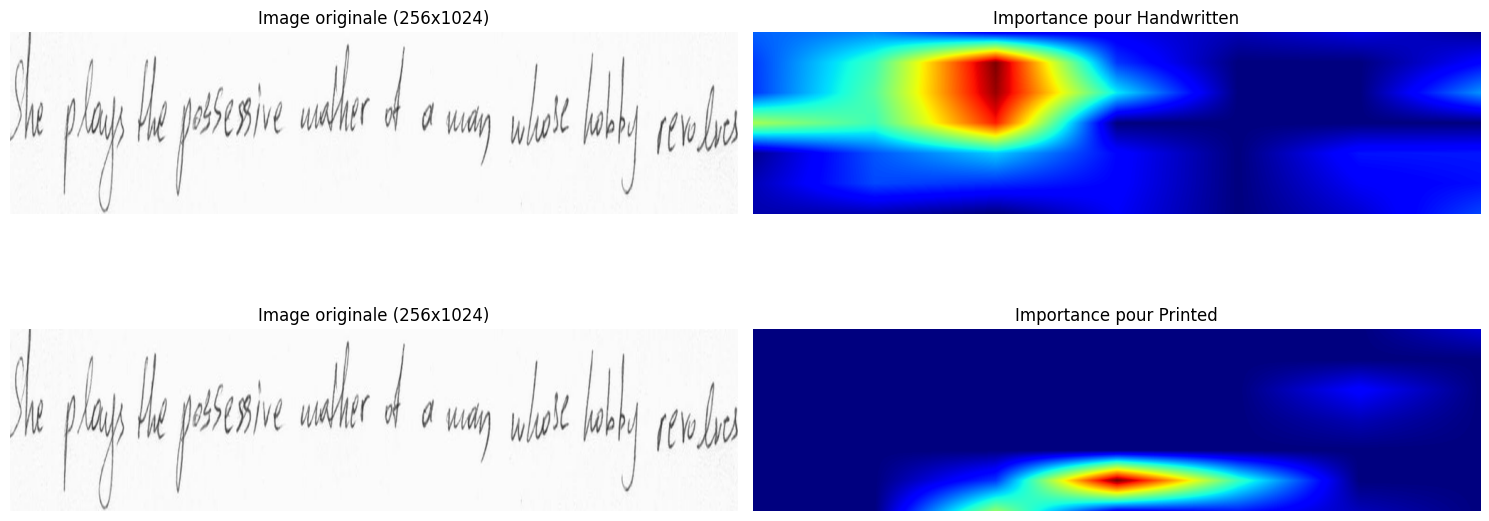

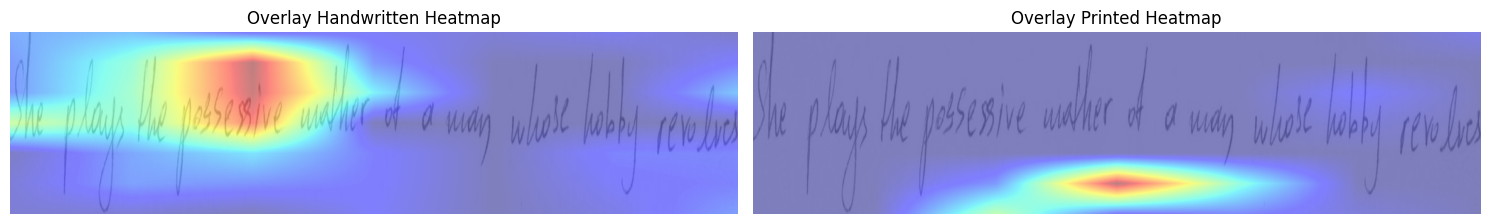

In [ ]:
import os

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import torch
from captum.attr import LayerGradCam
from PIL import Image
from torchvision import transforms

# Set device (prioritize CUDA, fallback to MPS or CPU)
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# Load the fine-tuned PyTorch model with the provided MLflow run ID
correct_run_id = "31979110704543208cb9bbaf7eba35a9"
model_uri = f"runs:/{correct_run_id}/fine_tuning_clf_model"
model = mlflow.pytorch.load_model(model_uri)
model.to(device)
model.eval()

# Define preprocessing to match training and inference
preprocess = transforms.Compose(
    [
        transforms.Resize((256, 1024)),  # Resize to 256x1024
        transforms.CenterCrop(224),  # Crop to 224x224 for MobileNetV2
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)

# Initialize LayerGradCam with the last convolutional layer of MobileNetV2
lig = LayerGradCam(model, model.features[18])


# Function to compute and upsample importance scores
def show_importance(
    model, input_tensor, target=0, output_size=(256, 1024), device=device
):
    input_tensor = input_tensor.to(device)
    model.to(device)
    # Compute Grad-CAM attributions (7x7 for features[18])
    attributions = lig.attribute(
        inputs=input_tensor, target=target, relu_attributions=True
    )
    # Sum across channels to get a 2D importance map
    importance = attributions.sum(dim=1).squeeze(0)
    # Normalize the importance map
    importance = importance.cpu().detach().numpy()
    importance = np.maximum(importance, 0)  # Keep only positive values
    if np.max(importance) != 0:  # Avoid division by zero
        importance /= np.max(importance)  # Normalize the heatmap
    # Upsample to match original image size (256x1024)
    zoom_factors = (
        output_size[0] / importance.shape[0],
        output_size[1] / importance.shape[1],
    )
    importance = zoom(importance, zoom_factors, order=1)  # Linear interpolation
    return importance


# Load an image from the directory
image_directory = Path("./app/training/images/")
image_files = [
    f
    for f in os.listdir(image_directory)
    if f.endswith(".png") or f.endswith(".jpg")
]

if not image_files:
    print(f"No image files found in {image_directory}")
else:
    # Select the first image
    selected_image = image_files[0]
    image_path = os.path.join(image_directory, selected_image)
    try:
        img = Image.open(image_path).convert("RGB")
        # Resize original image to 256x1024 for consistent display
        img_display = img.resize((1024, 256), Image.LANCZOS)

        # Preprocess the image for the model
        img_tensor = preprocess(img).unsqueeze(0)  # Shape: [1, 3, 224, 224]

        # Define class indices (0: Handwritten, 1: Printed)
        handwritten_index = 0
        printed_index = 1

        # Compute heatmaps for both classes, upsampled to 256x1024
        heatmap_handwritten = show_importance(
            model,
            img_tensor,
            target=handwritten_index,
            output_size=(256, 1024),
            device=device,
        )
        heatmap_printed = show_importance(
            model,
            img_tensor,
            target=printed_index,
            output_size=(256, 1024),
            device=device,
        )

        # Visualize the results
        plt.figure(figsize=(15, 7))

        # Original image (top left)
        plt.subplot(2, 2, 1)
        plt.imshow(img_display)
        plt.title("Image originale (256x1024)")
        plt.axis("off")

        # Heatmap for Handwritten (top right)
        plt.subplot(2, 2, 2)
        plt.imshow(heatmap_handwritten, cmap="jet")
        plt.title("Importance pour Handwritten")
        plt.axis("off")

        # Original image (bottom left)
        plt.subplot(2, 2, 3)
        plt.imshow(img_display)
        plt.title("Image originale (256x1024)")
        plt.axis("off")

        # Heatmap for Printed (bottom right)
        plt.subplot(2, 2, 4)
        plt.imshow(heatmap_printed, cmap="jet")
        plt.title("Importance pour Printed")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

        # Optional: Overlay heatmaps on the original image
        plt.figure(figsize=(15, 7))

        # Overlay for Handwritten
        plt.subplot(1, 2, 1)
        plt.imshow(img_display, alpha=0.5)
        plt.imshow(heatmap_handwritten, cmap="jet", alpha=0.5)
        plt.title("Overlay Handwritten Heatmap")
        plt.axis("off")

        # Overlay for Printed
        plt.subplot(1, 2, 2)
        plt.imshow(img_display, alpha=0.5)
        plt.imshow(heatmap_printed, cmap="jet", alpha=0.5)
        plt.title("Overlay Printed Heatmap")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {selected_image}: {e}")